<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.273290,95.388095,38.148032,-0.019966,195.789450,195.809196,-0.019745
1,0.0,1.0,40.808431,73.089285,25.322121,0.004107,149.223944,149.221162,0.002781
2,0.0,2.0,81.247215,43.770084,51.193309,0.020162,186.230769,186.207212,0.023557
3,0.0,3.0,48.174582,37.394798,52.319453,0.012317,147.901149,147.887886,0.013263
4,0.0,4.0,69.682773,68.067543,31.713100,-0.016905,179.446511,179.462134,-0.015624
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.947545,70.591939,46.287091,-0.012949,214.813627,214.825015,-0.011388
249996,999.0,246.0,54.522689,69.947891,28.941198,-0.003658,163.408119,163.410744,-0.002624
249997,999.0,247.0,61.554307,88.496095,92.760693,-0.010110,252.800985,252.808991,-0.008005
249998,999.0,248.0,70.457221,65.033459,93.102270,-0.014868,238.578083,238.588523,-0.010440


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.273290,95.388095,38.148032,-0.019966,195.789450,195.809196,-0.019745
1,0.0,1.0,40.808431,73.089285,25.322121,0.004107,149.223944,149.221162,0.002781
2,0.0,2.0,81.247215,43.770084,51.193309,0.020162,186.230769,186.207212,0.023557
3,0.0,3.0,48.174582,37.394798,52.319453,0.012317,147.901149,147.887886,0.013263
4,0.0,4.0,69.682773,68.067543,31.713100,-0.016905,179.446511,179.462134,-0.015624
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.947545,70.591939,46.287091,-0.012949,214.813627,214.825015,-0.011388
249996,999.0,246.0,54.522689,69.947891,28.941198,-0.003658,163.408119,163.410744,-0.002624
249997,999.0,247.0,61.554307,88.496095,92.760693,-0.010110,252.800985,252.808991,-0.008005
249998,999.0,248.0,70.457221,65.033459,93.102270,-0.014868,238.578083,238.588523,-0.010440


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.273290  95.388095  38.148032 -0.019966  195.789450   
      1.0    40.808431  73.089285  25.322121  0.004107  149.223944   
      2.0    81.247215  43.770084  51.193309  0.020162  186.230769   
      3.0    48.174582  37.394798  52.319453  0.012317  147.901149   
      4.0    69.682773  68.067543  31.713100 -0.016905  179.446511   
...                ...        ...        ...       ...         ...   
999.0 245.0  87.947545  70.591939  46.287091 -0.012949  214.813627   
      246.0  54.522689  69.947891  28.941198 -0.003658  163.408119   
      247.0  61.554307  88.496095  92.760693 -0.010110  252.800985   
      248.0  70.457221  65.033459  93.102270 -0.014868  238.578083   
      249.0  83.215140  56.660685  33.535211 -0.013118  183.397918   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.809196 -0.019745  
      1.0    149.221162  0.002781  
      2.0    186.207212  0.023557  
      3.0    147.887886  0.013263  
      4.0    179.462134 -0.015624  
...                 ...       ...  
999.0 245.0  214.825015 -0.011388  
      246.0  163.410744 -0.002624  
      247.0  252.808991 -0.008005  
      248.0  238.588523 -0.010440  
      249.0  183.408636 -0.010718  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.273290  95.388095  38.148032 -0.019966  195.789450   
      1.0    40.808431  73.089285  25.322121  0.004107  149.223944   
      2.0    81.247215  43.770084  51.193309  0.020162  186.230769   
      3.0    48.174582  37.394798  52.319453  0.012317  147.901149   
      4.0    69.682773  68.067543  31.713100 -0.016905  179.446511   
...                ...        ...        ...       ...         ...   
999.0 245.0  87.947545  70.591939  46.287091 -0.012949  214.813627   
      246.0  54.522689  69.947891  28.941198 -0.003658  163.408119   
      247.0  61.554307  88.496095  92.760693 -0.010110  252.800985   
      248.0  70.457221  65.033459  93.102270 -0.014868  238.578083   
      249.0  83.215140  56.660685  33.535211 -0.013118  183.397918   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.809196 -0.019745  
      1.0    149.221162  0.002781  
      2.0    186.207212  0.023557  
      3.0    147.887886  0.013263  
      4.0    179.462134 -0.015624  
...                 ...       ...  
999.0 245.0  214.825015 -0.011388  
      246.0  163.410744 -0.002624  
      247.0  252.808991 -0.008005  
      248.0  238.588523 -0.010440  
      249.0  183.408636 -0.010718  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.273290,95.388095,38.148032,-0.019966,195.789450,195.809196,-0.019745
1,0.0,1.0,40.808431,73.089285,25.322121,0.004107,149.223944,149.221162,0.002781
2,0.0,2.0,81.247215,43.770084,51.193309,0.020162,186.230769,186.207212,0.023557
3,0.0,3.0,48.174582,37.394798,52.319453,0.012317,147.901149,147.887886,0.013263
4,0.0,4.0,69.682773,68.067543,31.713100,-0.016905,179.446511,179.462134,-0.015624
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.947545,70.591939,46.287091,-0.012949,214.813627,214.825015,-0.011388
249996,999.0,246.0,54.522689,69.947891,28.941198,-0.003658,163.408119,163.410744,-0.002624
249997,999.0,247.0,61.554307,88.496095,92.760693,-0.010110,252.800985,252.808991,-0.008005
249998,999.0,248.0,70.457221,65.033459,93.102270,-0.014868,238.578083,238.588523,-0.010440


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.273290  95.388095  38.148032 -0.019966  195.789450   
      1.0    40.808431  73.089285  25.322121  0.004107  149.223944   
      2.0    81.247215  43.770084  51.193309  0.020162  186.230769   
      3.0    48.174582  37.394798  52.319453  0.012317  147.901149   
      4.0    69.682773  68.067543  31.713100 -0.016905  179.446511   
...                ...        ...        ...       ...         ...   
999.0 245.0  87.947545  70.591939  46.287091 -0.012949  214.813627   
      246.0  54.522689  69.947891  28.941198 -0.003658  163.408119   
      247.0  61.554307  88.496095  92.760693 -0.010110  252.800985   
      248.0  70.457221  65.033459  93.102270 -0.014868  238.578083   
      249.0  83.215140  56.660685  33.535211 -0.013118  183.397918   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.809196 -0.019745  
      1.0    149.221162  0.002781  
      2.0    186.207212  0.023557  
      3.0    147.887886  0.013263  
      4.0    179.462134 -0.015624  
...                 ...       ...  
999.0 245.0  214.825015 -0.011388  
      246.0  163.410744 -0.002624  
      247.0  252.808991 -0.008005  
      248.0  238.588523 -0.010440  
      249.0  183.408636 -0.010718  

[250000 rows x 7 columns]

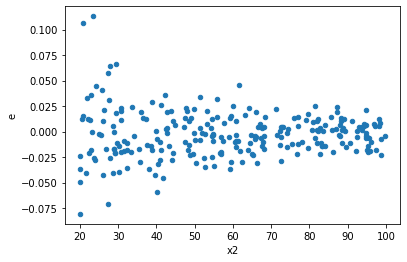

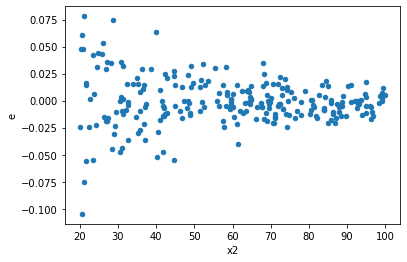

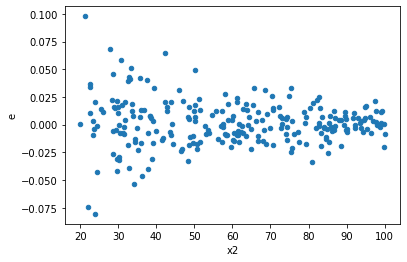

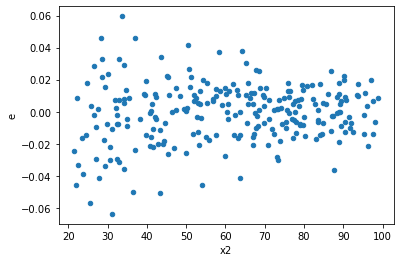

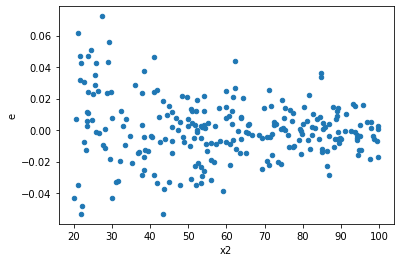

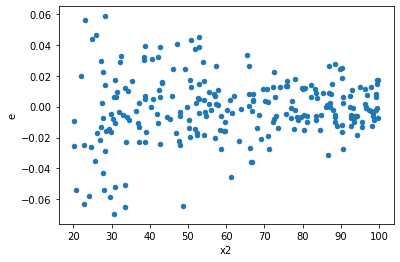

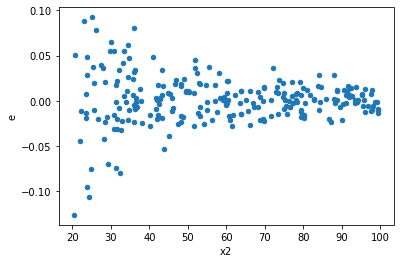

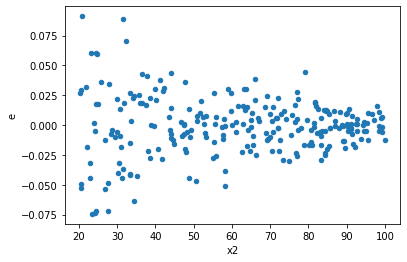

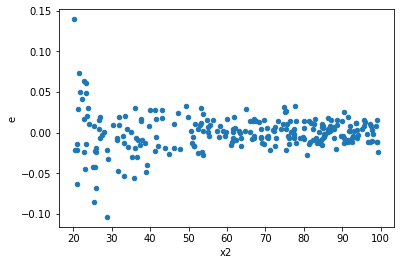

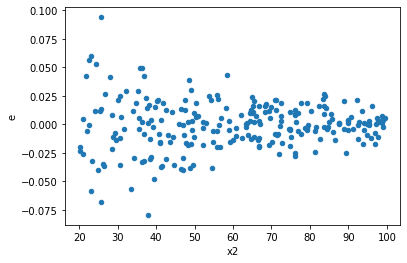

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
682.0,97.0,97.0,0.0560689914715881,0.056595363168439224,0.0005780308399132794,0.0005834573522519507,1.0093879287469945,0.963393133750341,0.5183034331248295,0.4816965668751705,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.07367017424421654,0.018537308143992157,0.0007594863324146035,0.00019110626952569234,0.2516256861635891,6.378694097495874e-11,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,0.07650743122882014,0.019523589758632123,0.0007887364044208262,0.0002012741212230116,0.25518553485661455,9.640949045757234e-11,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,0.06311585566200482,0.026158081272770372,0.0006506789243505652,0.0002696709409563956,0.4144454828094377,2.049002367055857e-05,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,0.03877990512573938,0.021053151421322084,0.00039979283634782866,0.00021704279815795962,0.5428881621308681,0.002905465478064917,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.046464894677091646,0.023983274240190863,0.00047901953275352214,0.0002472502498988749,0.5161590143884522,0.0012840358940304675,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,0.0608517161919791,0.022155123936118862,0.0006273372803296814,0.00022840333954761714,0.36408379783772055,1.1557879048365682e-06,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.11584298699993067,0.03379896737727955,0.0011942575979374296,0.0003484429626523665,0.2917653304062315,4.246150336667887e-09,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,0.09262425485845695,0.043482991538701325,0.000954889225344917,0.00044827826328558065,0.4694557770548279,0.00024121634176207504,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,0.09845981559432483,0.016245222755610227,0.001015049645302318,0.0001674765232537137,0.16499343064528948,7.272335754828231e-17,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    975
Reject005=1 : Homoscedasticity       25
Name: Result_test, dtype: int64